In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:06<00:00, 118MB/s]
100% 1.06G/1.06G [00:06<00:00, 183MB/s]


In [6]:
# Unzipping data
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
# Importing libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

In [8]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256))

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Normalize data array
def process(image,label):
  image = tf.cast(image/255 , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
# CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [12]:
# Compiling model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 85ms/step - loss: 0.6159 - accuracy: 0.6558 - val_loss: 0.5631 - val_accuracy: 0.7086
Epoch 2/10
625/625 [==============================] - 56s 88ms/step - loss: 0.4820 - accuracy: 0.7668 - val_loss: 0.4382 - val_accuracy: 0.7976
Epoch 3/10
625/625 [==============================] - 54s 85ms/step - loss: 0.3769 - accuracy: 0.8313 - val_loss: 0.4462 - val_accuracy: 0.8110
Epoch 4/10
625/625 [==============================] - 59s 93ms/step - loss: 0.2606 - accuracy: 0.8889 - val_loss: 0.5808 - val_accuracy: 0.8014
Epoch 5/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1494 - accuracy: 0.9401 - val_loss: 0.7224 - val_accuracy: 0.7928
Epoch 6/10
625/625 [==============================] - 55s 87ms/step - loss: 0.0973 - accuracy: 0.9650 - val_loss: 0.9389 - val_accuracy: 0.7874
Epoch 7/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0617 - accuracy: 0.9776 - val_loss: 1.0313 - val_accuracy:

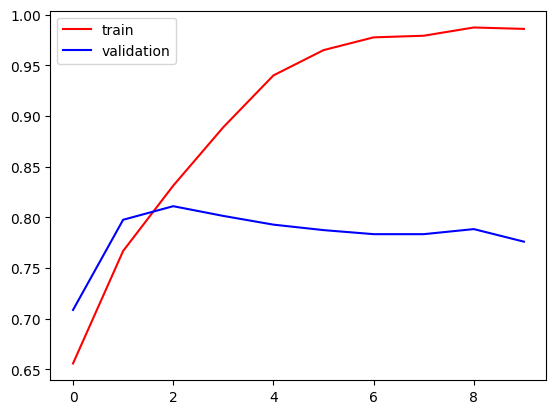

In [14]:
# Visualization accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

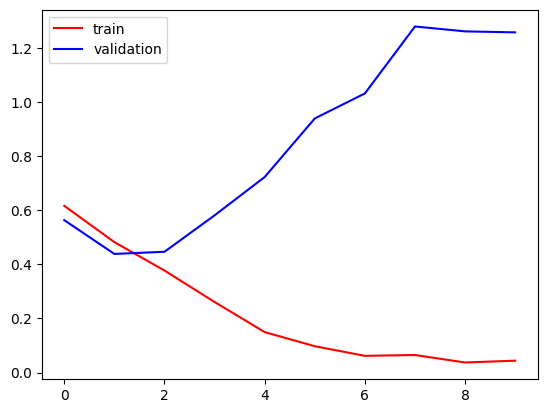

In [15]:
# Visualization loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

**MODEL IS OVERFITTING**



In [17]:
# USING BATCH NORMALIZATION AND DROPOUT
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))

In [18]:
# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [19]:
# Compiling model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 106ms/step - loss: 1.6311 - accuracy: 0.5789 - val_loss: 0.7358 - val_accuracy: 0.6120
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5967 - accuracy: 0.6923 - val_loss: 0.6162 - val_accuracy: 0.6946
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5062 - accuracy: 0.7526 - val_loss: 0.4939 - val_accuracy: 0.7624
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4480 - accuracy: 0.7940 - val_loss: 0.4319 - val_accuracy: 0.7978
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3900 - accuracy: 0.8253 - val_loss: 0.4566 - val_accuracy: 0.7860
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3242 - accuracy: 0.8621 - val_loss: 0.4691 - val_accuracy: 0.8048
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2588 - accuracy: 0.8902 - val_loss: 0.4559 - val_ac

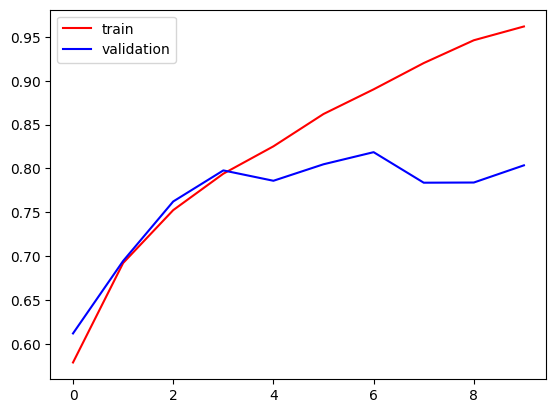

In [21]:
# Visualization accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

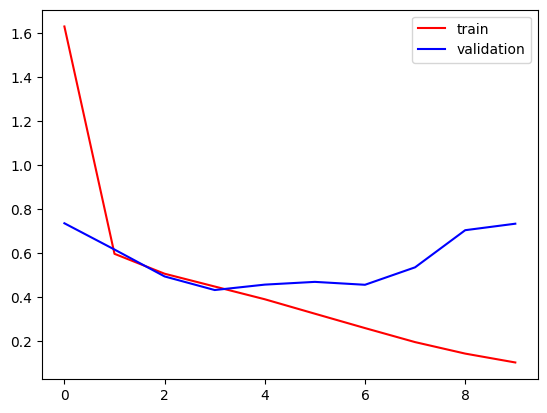

In [22]:
# Visualization loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()